# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
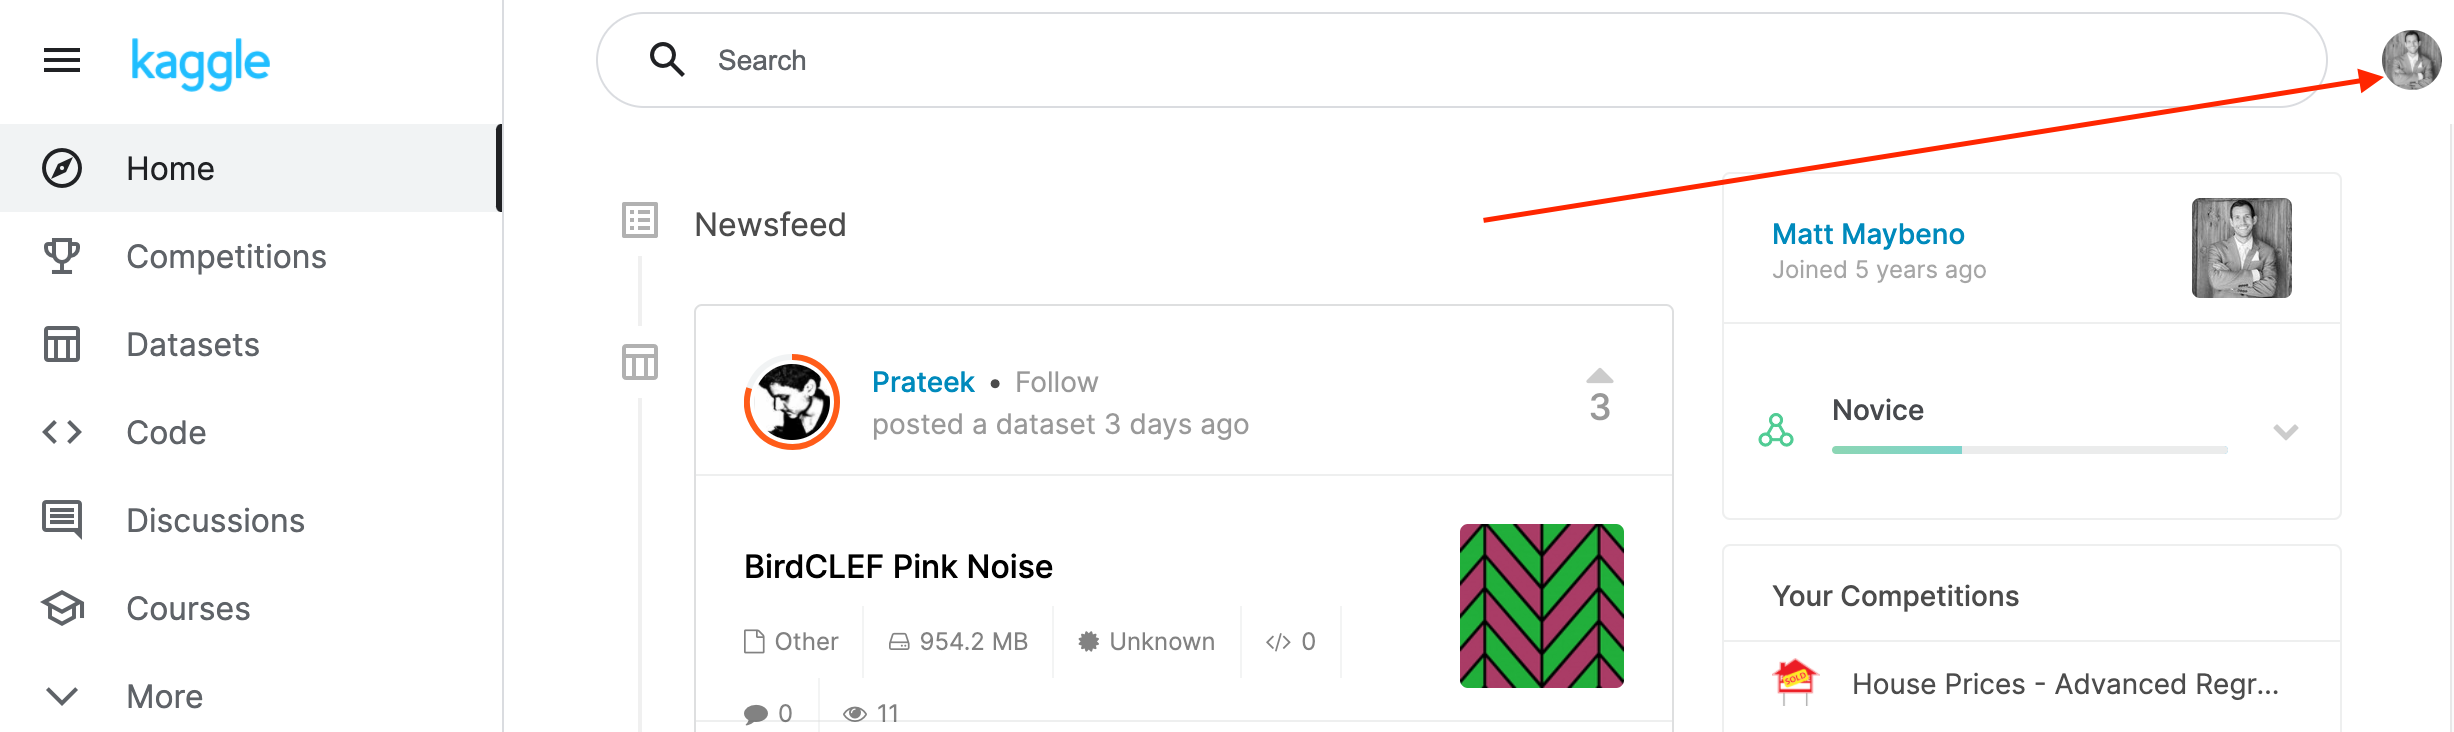
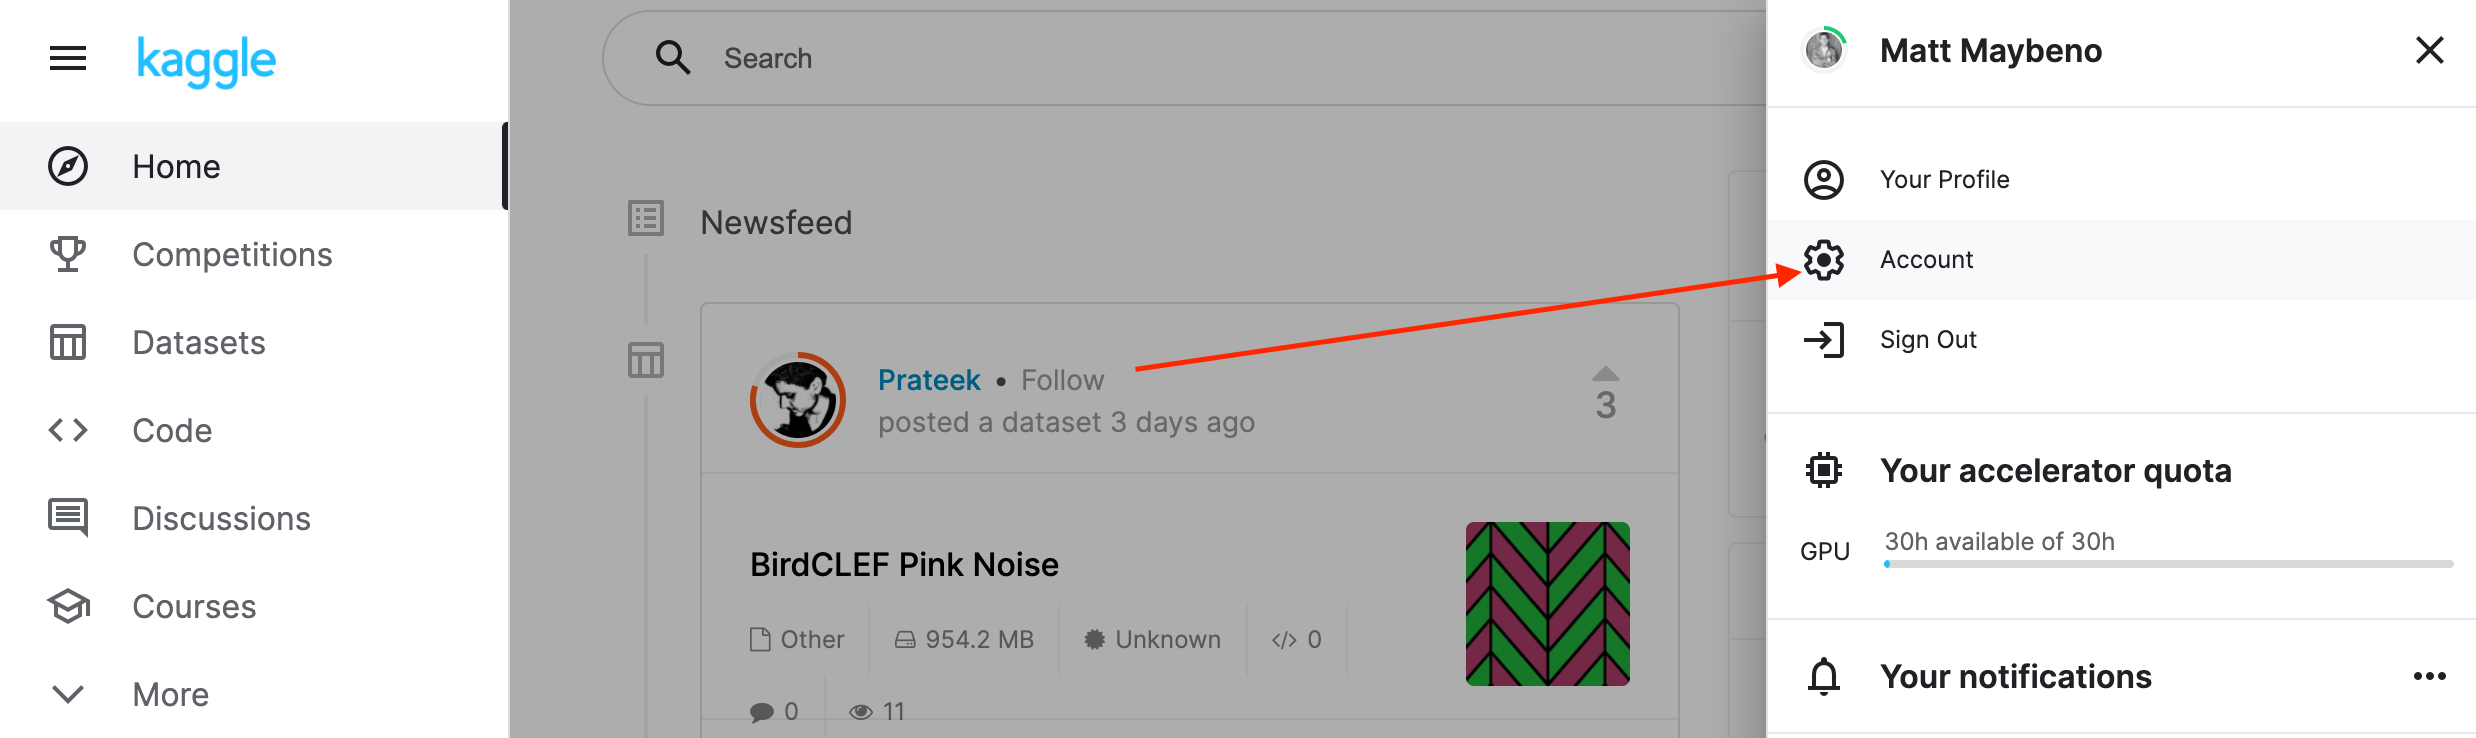
2. Scroll down to API and click Create New API Token.
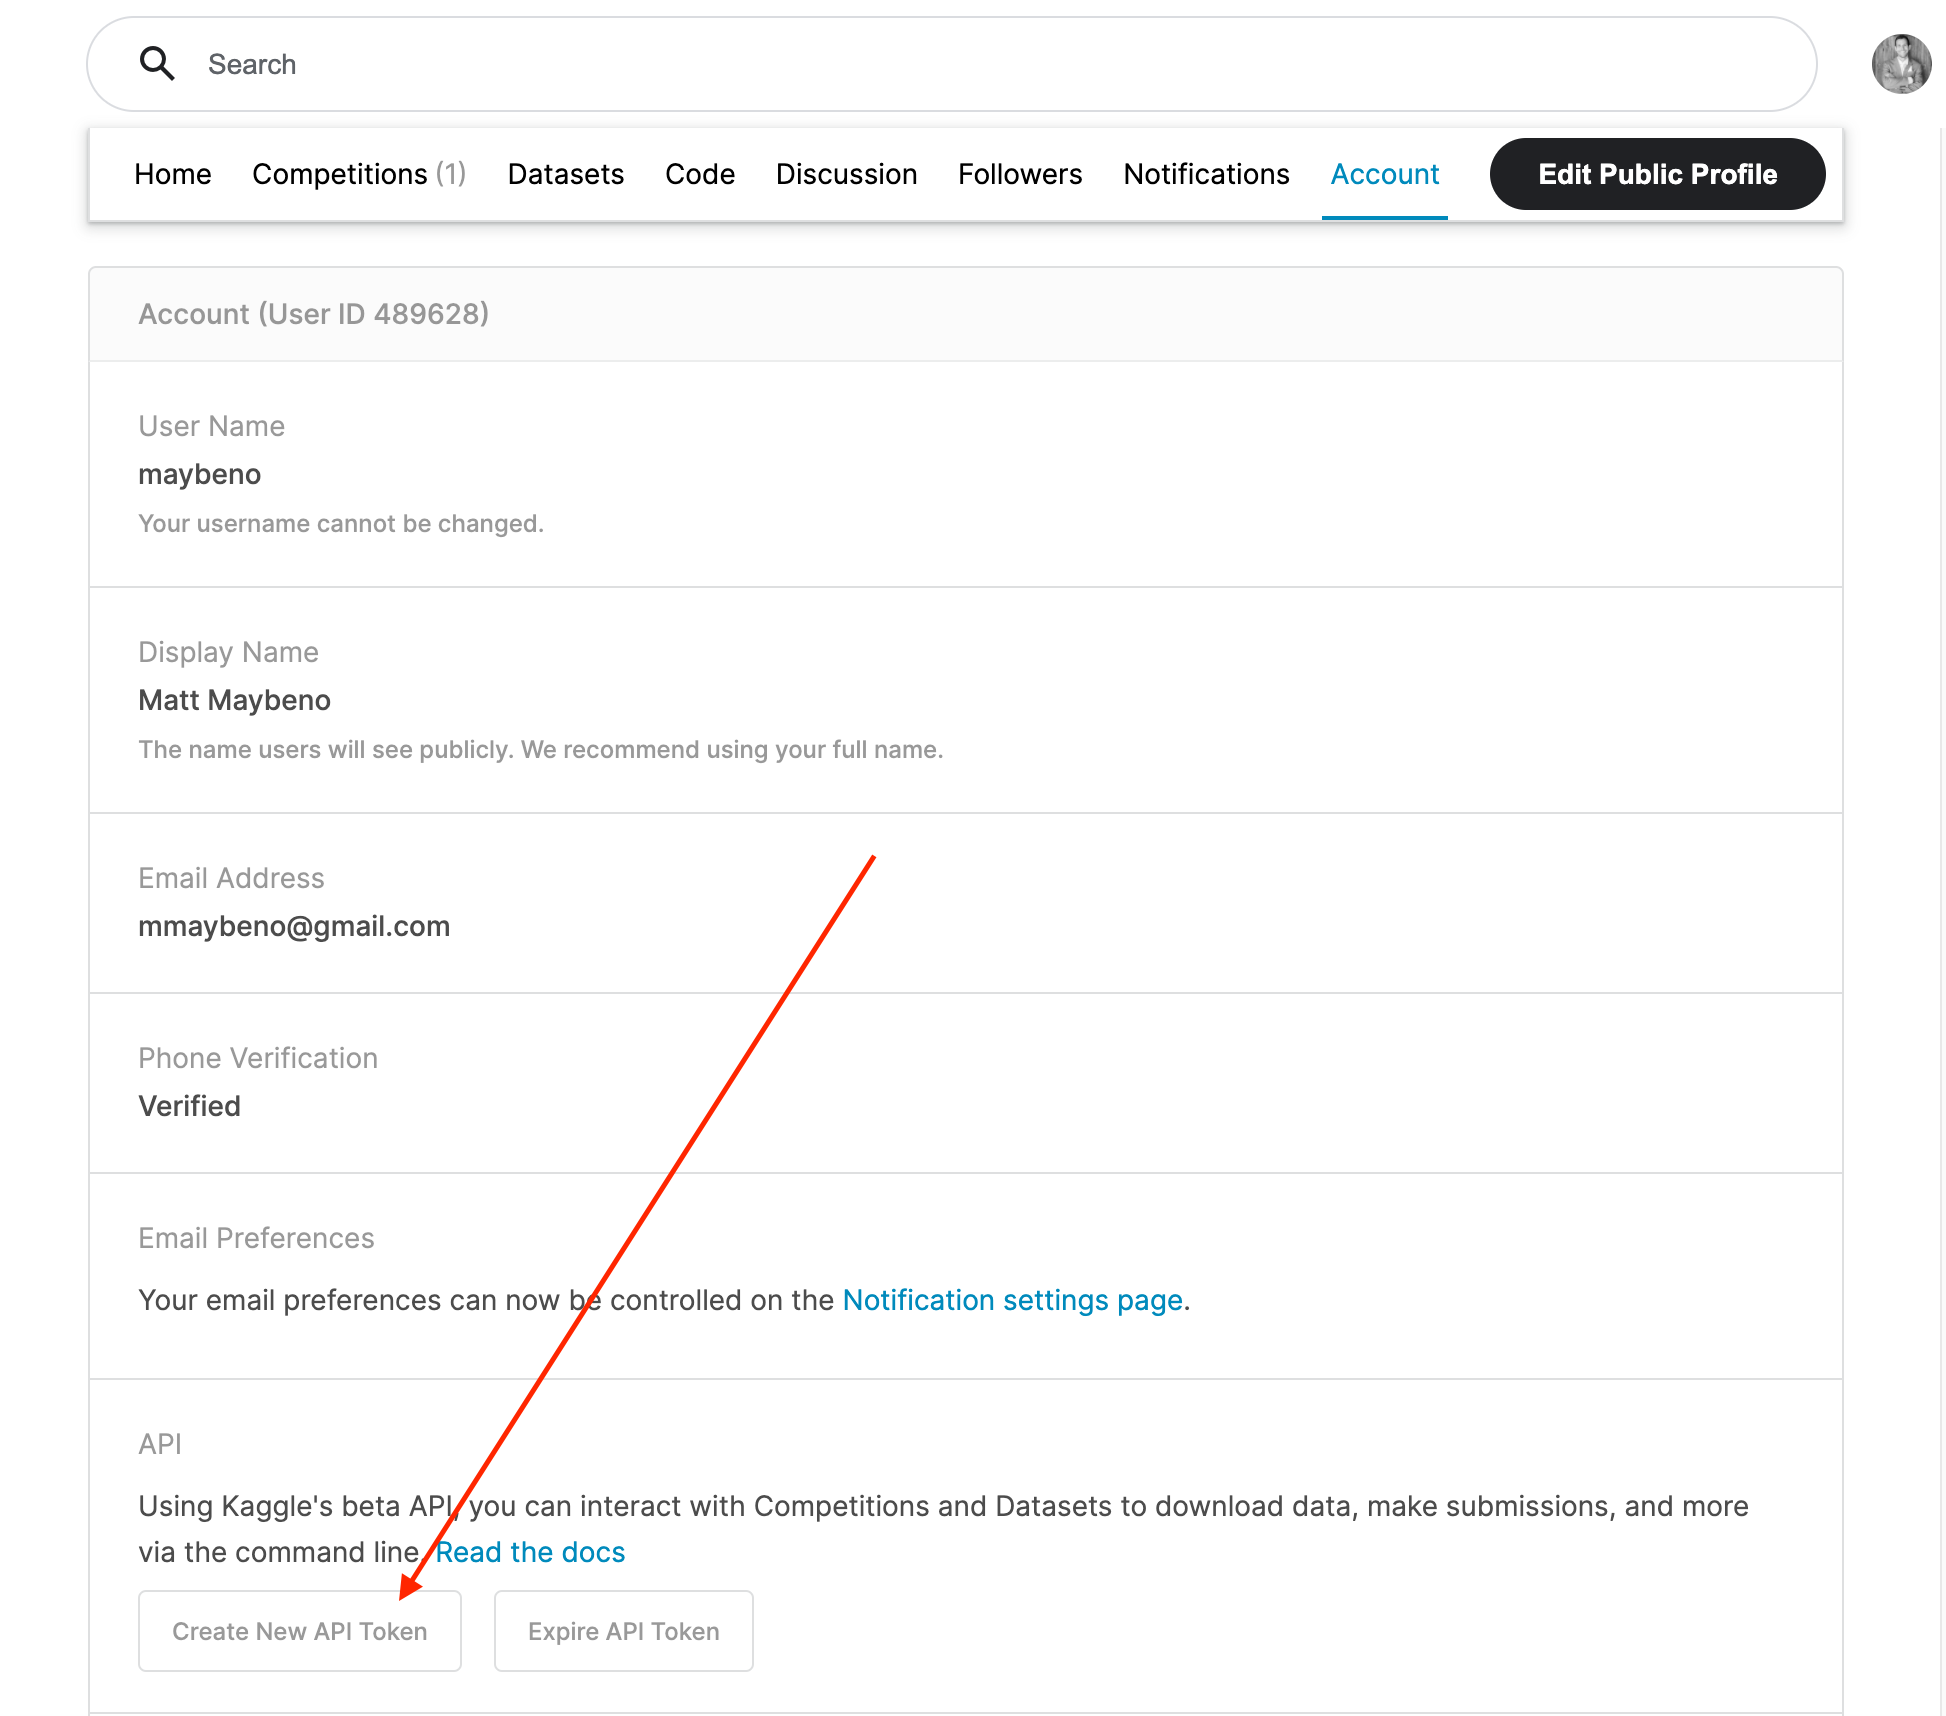
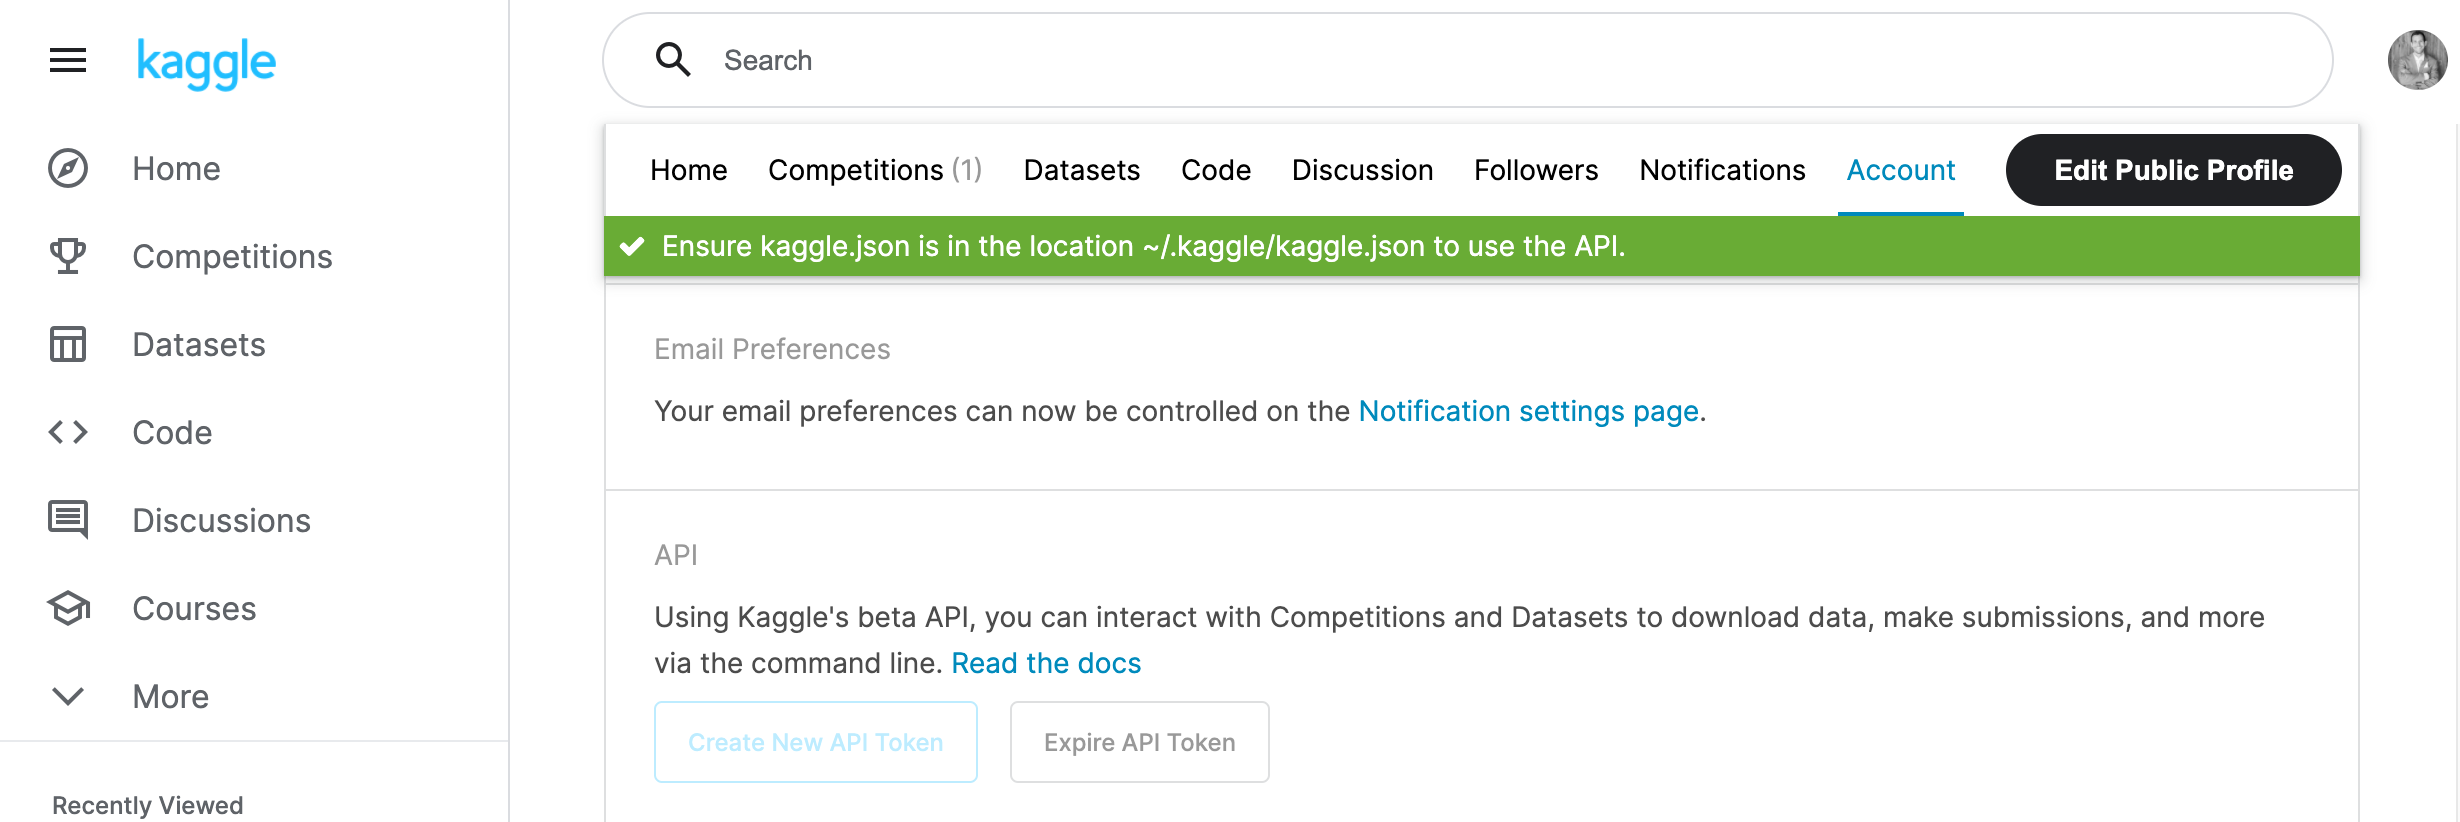
3. Open up `kaggle.json` and use the username and key.
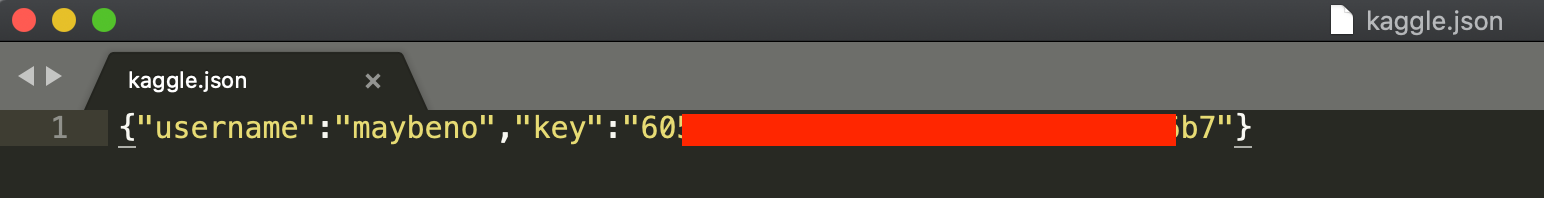

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

### Setup Kaggle API Key

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
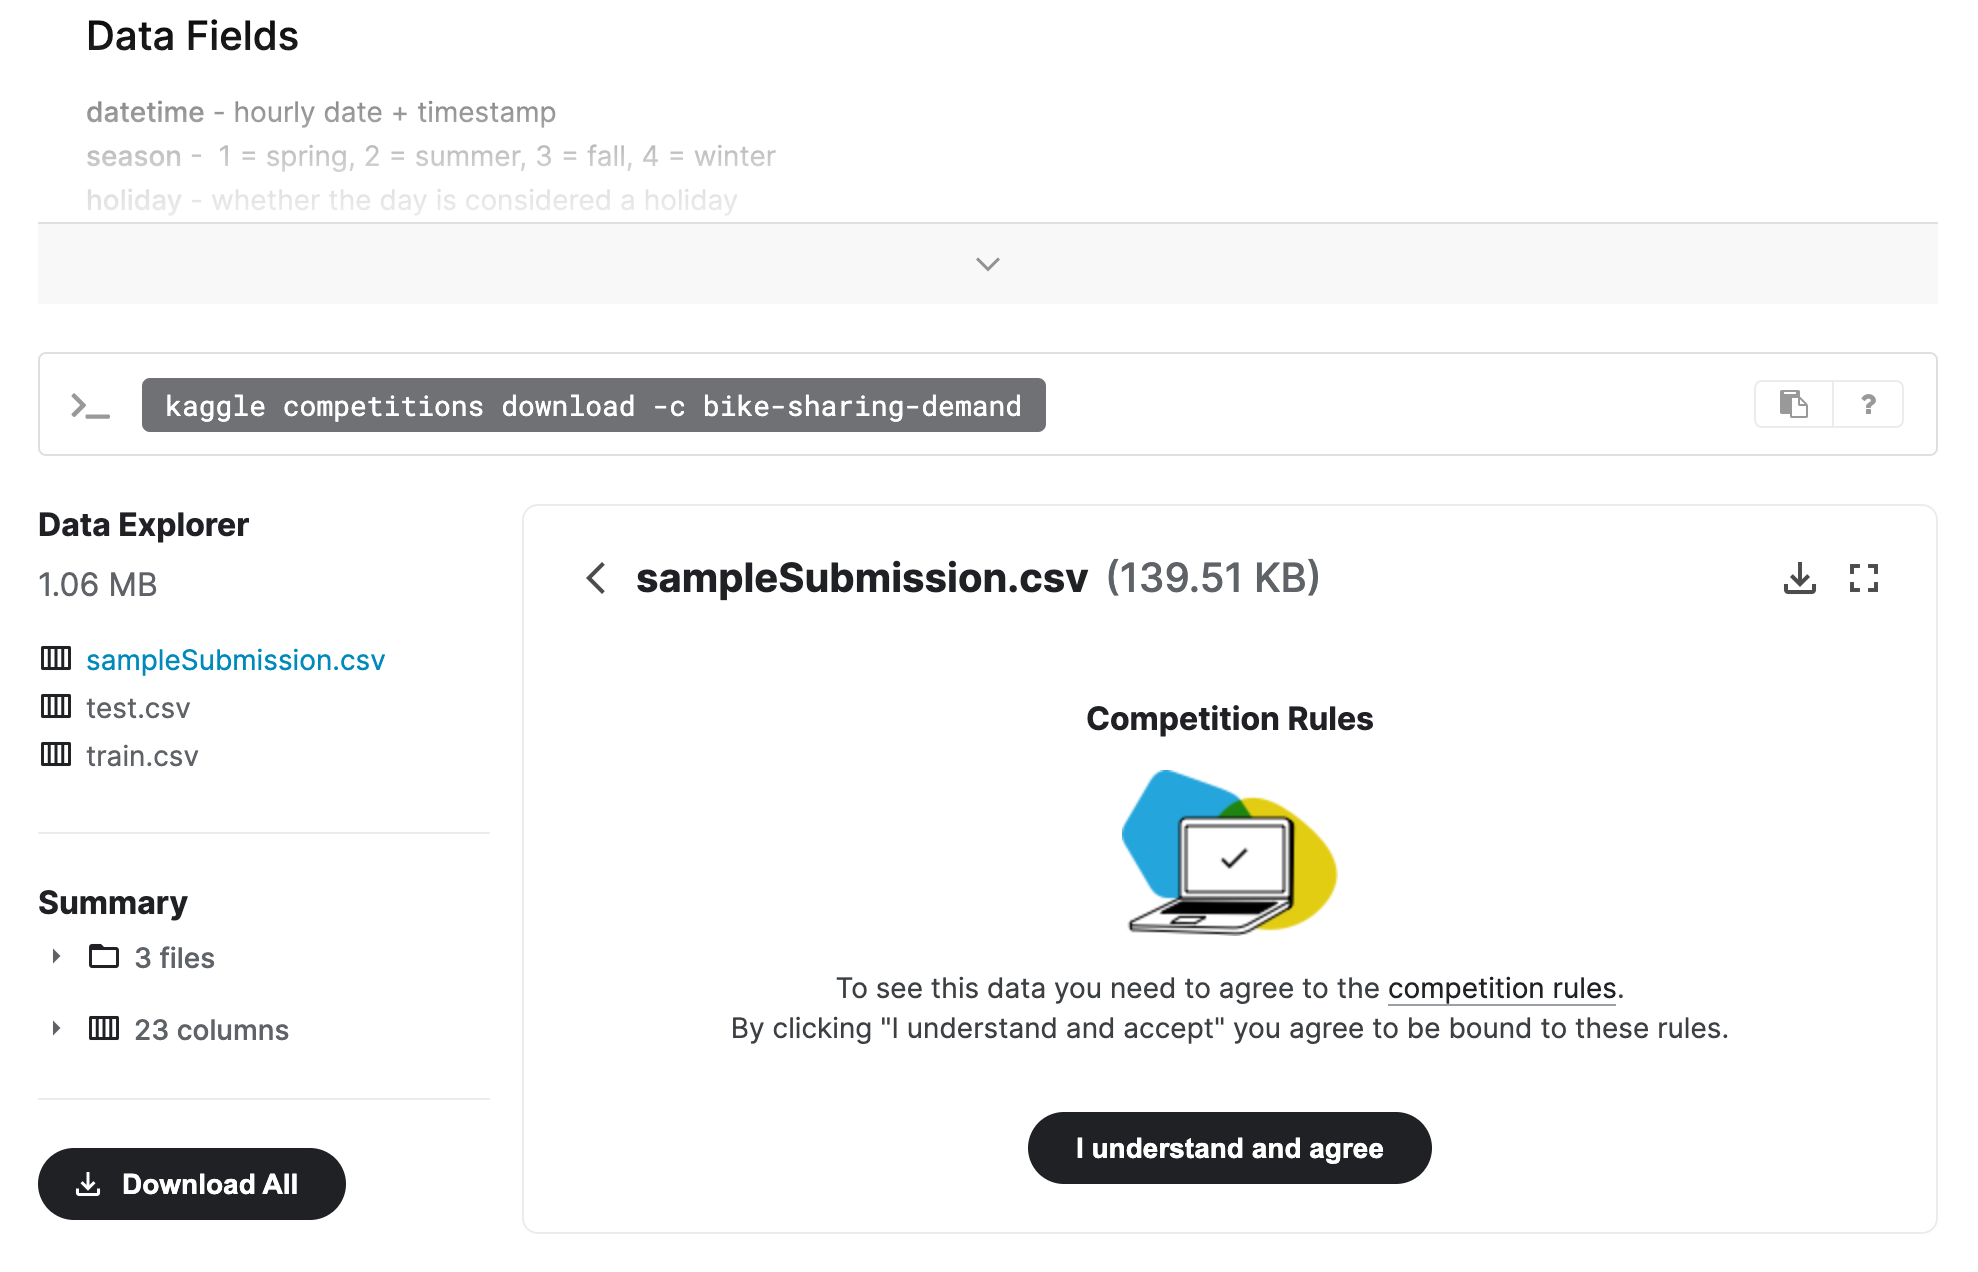

In [7]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
#!unzip -o bike-sharing-demand.zip 

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from autogluon.tabular import TabularPredictor

c:\Users\mmabd\.conda\envs\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("bike-sharing-demand/train.csv", parse_dates=["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [4]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("bike-sharing-demand/test.csv", parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
# Same thing as train and test dataset
submission = pd.read_csv("bike-sharing-demand/sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [8]:
predictor = TabularPredictor(label='count',learner_kwargs={"ignored_columns": ["casual", "registered"]}).fit(train_data=train.drop(columns=['casual', 'registered']))

No path specified. Models will be saved in: "AutogluonModels\ag-20240418_194207"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240418_194207"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.9.19
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          16
Memory Avail:      

[1000]	valid_set's rmse: 136.065


	0.75s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBM ...
	-134.0804	 = Validation score   (-root_mean_squared_error)
	0.61s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-122.0136	 = Validation score   (-root_mean_squared_error)
	1.7s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: CatBoost ...
	-134.2362	 = Validation score   (-root_mean_squared_error)
	5.22s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-128.4202	 = Validation score   (-root_mean_squared_error)
	0.92s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-136.3895	 = Validation score   (-root_mean_squared_error)
	8.88s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-135.769	 = Validation score   (-root_mean_squared_error)
	0.47s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-139.0499	 = Vali

### Review AutoGluon's training run with ranking of models that did the best.

In [9]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -92.389673  root_mean_squared_error       0.028358   0.034421                0.000000           0.019024            2       True         12
1        KNeighborsDist  -92.389673  root_mean_squared_error       0.028358   0.015397                0.028358           0.015397            1       True          2
2        KNeighborsUnif -109.626075  root_mean_squared_error       0.028645   0.017380                0.028645           0.017380            1       True          1
3       RandomForestMSE -122.013622  root_mean_squared_error       0.059973   1.703606                0.059973           1.703606            1       True          5
4         ExtraTreesMSE -128.420222  root_mean_squared_error       0.074220   0.917657                0.074220   

c:\Users\mmabd\.conda\envs\myenv\lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': -109.62607530626073,
  'KNeighborsDist': -92.38967289813668,
  'LightGBMXT': -135.95803375936984,
  'LightGBM': -134.0804268849742,
  'RandomForestMSE': -122.01362204763117,
  'CatBoost': -134.23616330181272,
  'ExtraTreesMSE': -128.42022189393495,
  'NeuralNetFastAI': -136.38952940993025,
  'XGBoost': -135.7689524728067,
  'NeuralNetTorch': -139.0499435395411,
  'LightGBMLarge': -132.1735605846617,
  'WeightedEnsemble_L2': -92.38967289813668},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': ['KNe

### Create predictions from test dataset

In [21]:
predictions = predictor.predict(test)
predictions.head()

0    51.861626
1    56.686295
2    59.077763
3    60.468830
4    61.419930
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [22]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      135.832214
std       132.537704
min         3.424214
25%        23.827692
50%        71.032265
75%       203.938919
max       537.853882
Name: count, dtype: float64

In [23]:
# How many negative values do we have?
(predictions < 0).sum()

0

In [24]:
# Set them to zero
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [25]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [27]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/195k [00:00<?, ?B/s]
  4%|▍         | 8.00k/195k [00:00<00:09, 20.5kB/s]
 95%|█████████▍| 184k/195k [00:00<00:00, 456kB/s]  
100%|██████████| 195k/195k [00:01<00:00, 141kB/s]


#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [29]:
!kaggle competitions submissions -c bike-sharing-demand 

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2024-04-18 14:32:49  first raw submission  complete  1.86413      1.86413       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

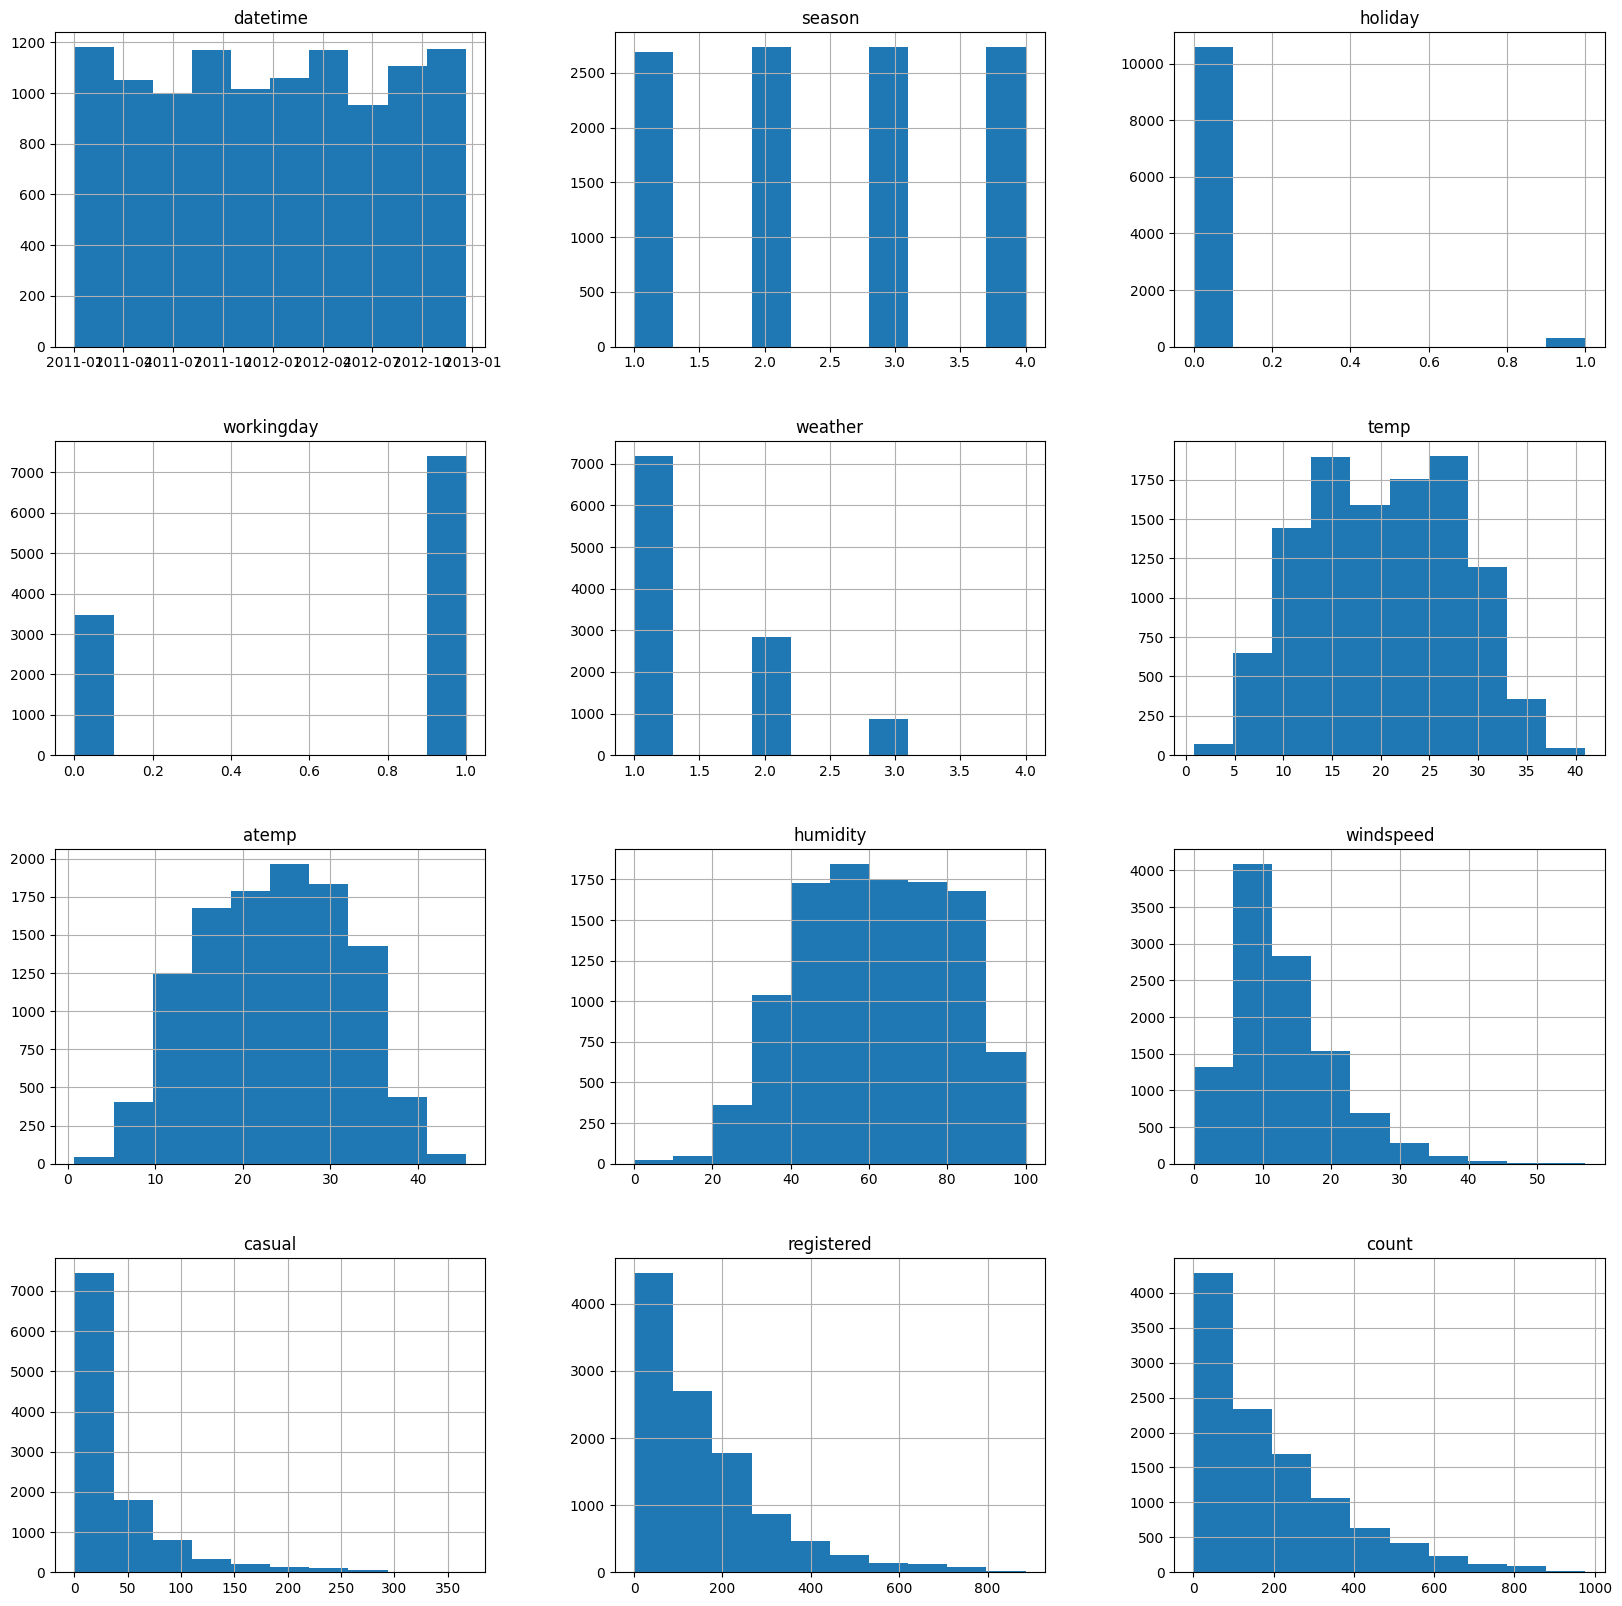

In [80]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(20, 20));

In [10]:
# create a new feature
train['day_in_year'] = train['datetime'].dt.dayofyear   # day of year
train['hour'] = train['datetime'].dt.hour               # hour of day
train['day_of_week'] = train['datetime'].dt.dayofweek   # day of week
test['day_in_year'] = test['datetime'].dt.dayofyear     # day of year
test['hour'] = test['datetime'].dt.hour                 # hour of day
test['day_of_week'] = test['datetime'].dt.dayofweek     # day of week

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [11]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [83]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day_in_year,hour,day_of_week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4,5


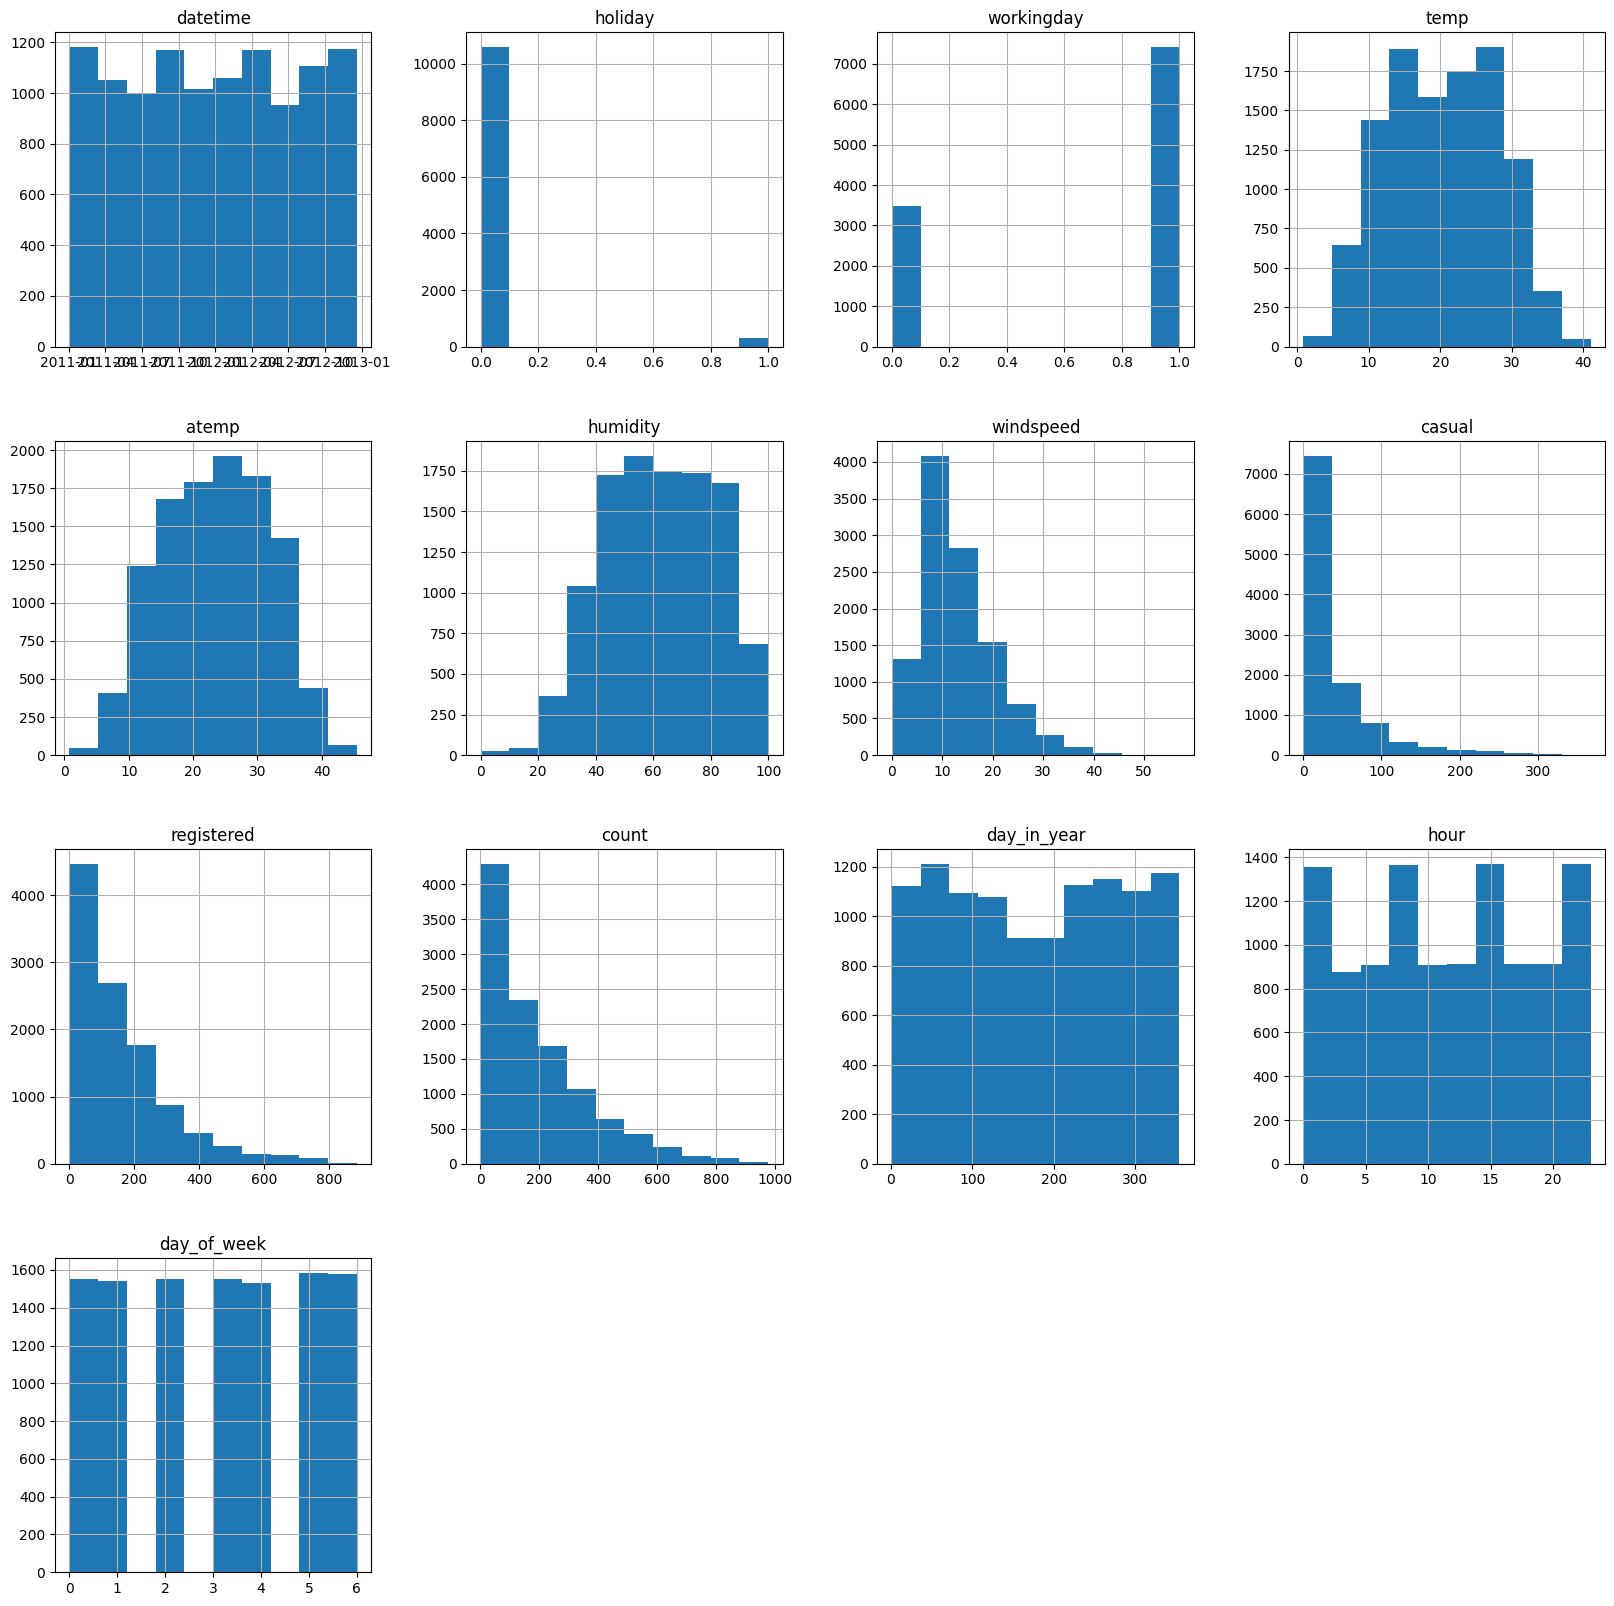

In [84]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(20, 20));

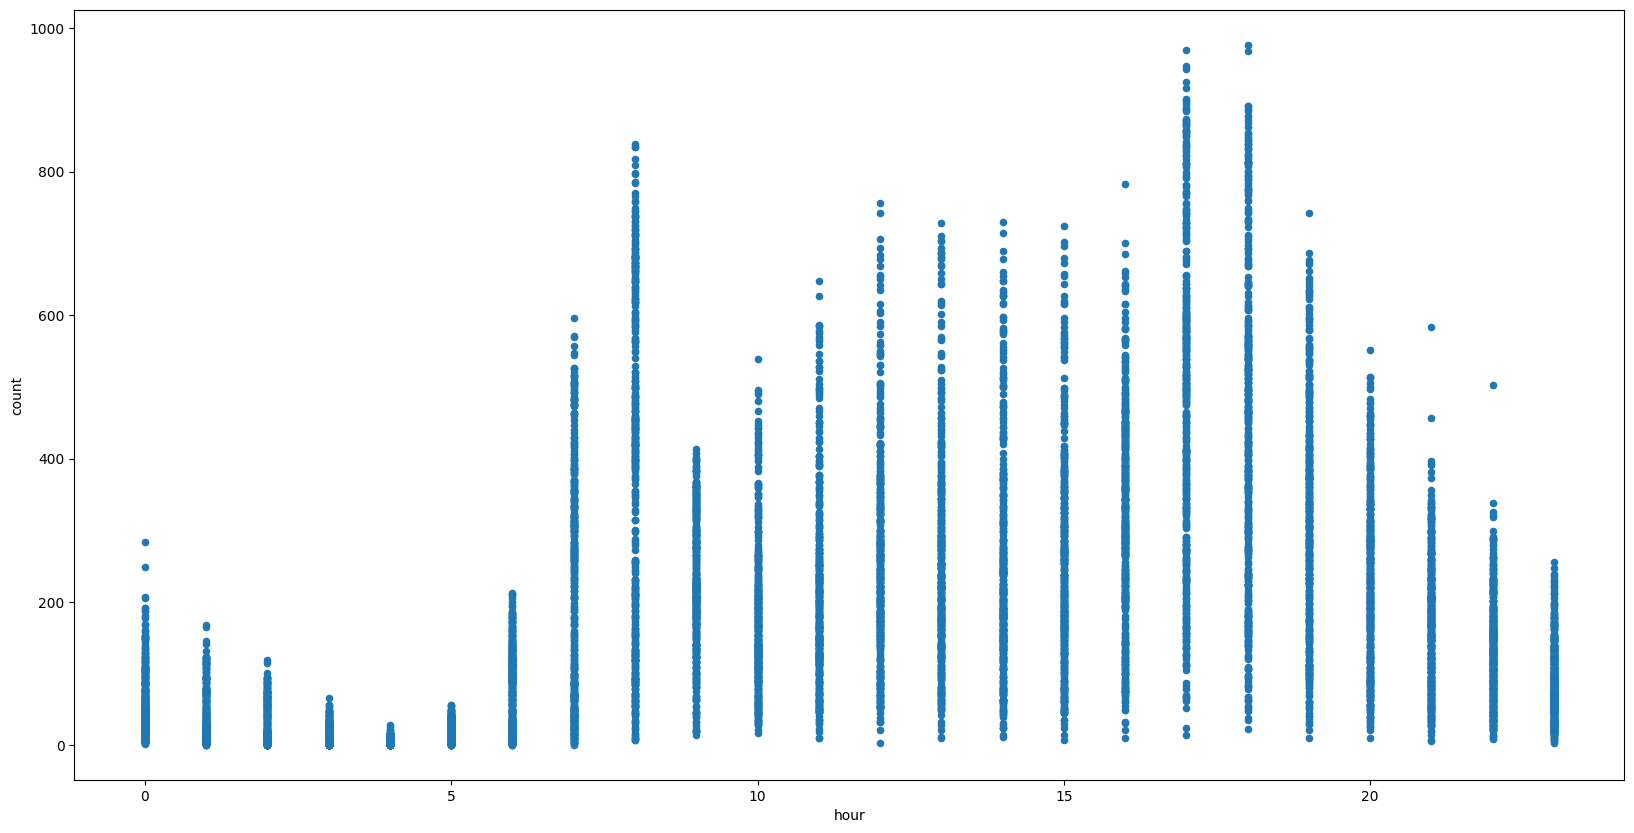

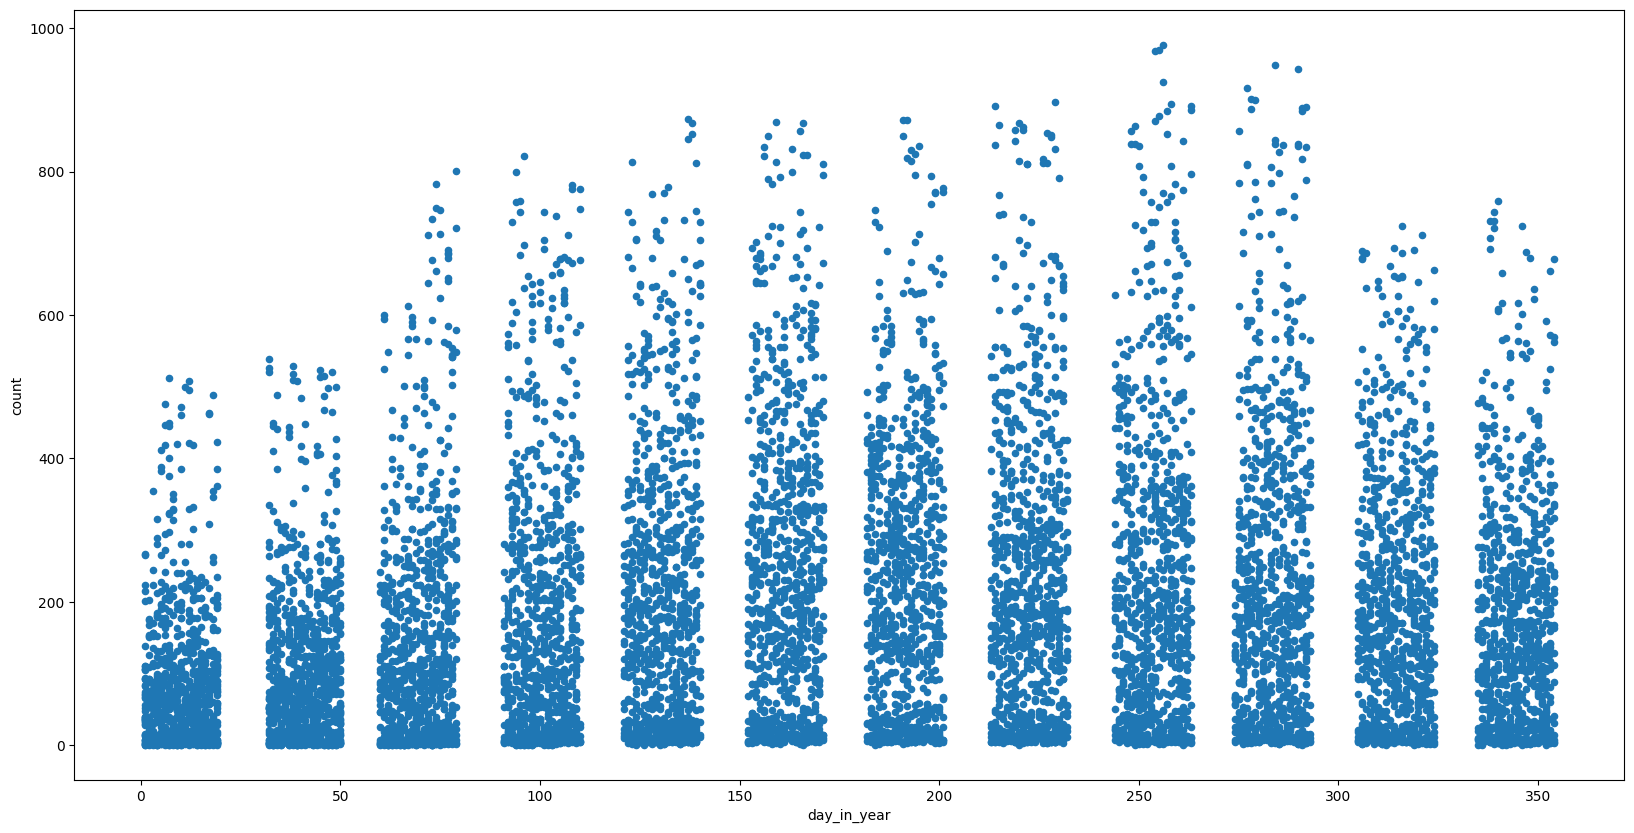

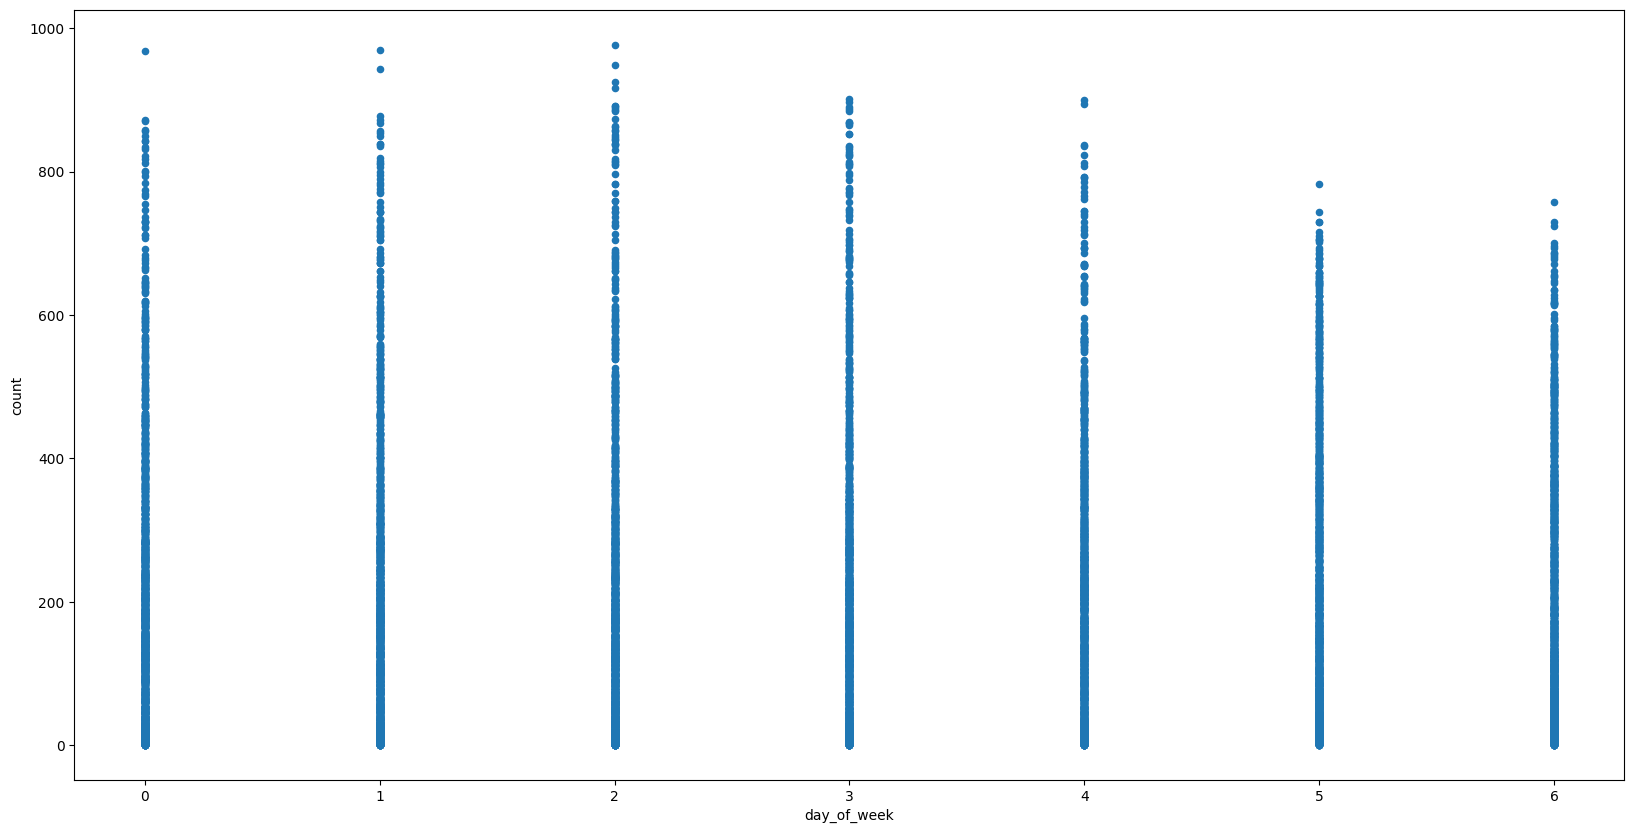

In [85]:
train.plot(x='hour', y='count', figsize=(20, 10), kind='scatter');
train.plot(x='day_in_year', y='count', figsize=(20, 10), kind='scatter');
train.plot(x='day_of_week', y='count', figsize=(20, 10), kind='scatter');

## Step 5: Rerun the model with the same settings as before, just with more features

In [86]:
predictor_new_features = TabularPredictor(label='count',learner_kwargs={"ignored_columns": ["casual", "registered"]}).\
    fit(train_data=train,
        time_limit=600,
        presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels\ag-20240418_174618"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels\ag-20240418_174618\ds_sub_fit\sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 157 seconds

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -29.232798  root_mean_squared_error      11.828404  399.430944                0.001000           0.049469            3       True         18
1   NeuralNetFastAI_BAG_L2  -29.453694  root_mean_squared_error      11.659198  295.048600                0.256596          19.141982            2       True         17
2          CatBoost_BAG_L2  -30.376264  root_mean_squared_error      11.450624  377.560290                0.048023         101.653671            2       True         15
3          LightGBM_BAG_L2  -30.522172  root_mean_squared_error      11.522786  278.585822                0.120184           2.679203            2       True         13
4        LightGBMXT_BAG_L2  -31.122069  root_mean_squared_error      11.740191  279.626200   

c:\Users\mmabd\.conda\envs\myenv\lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


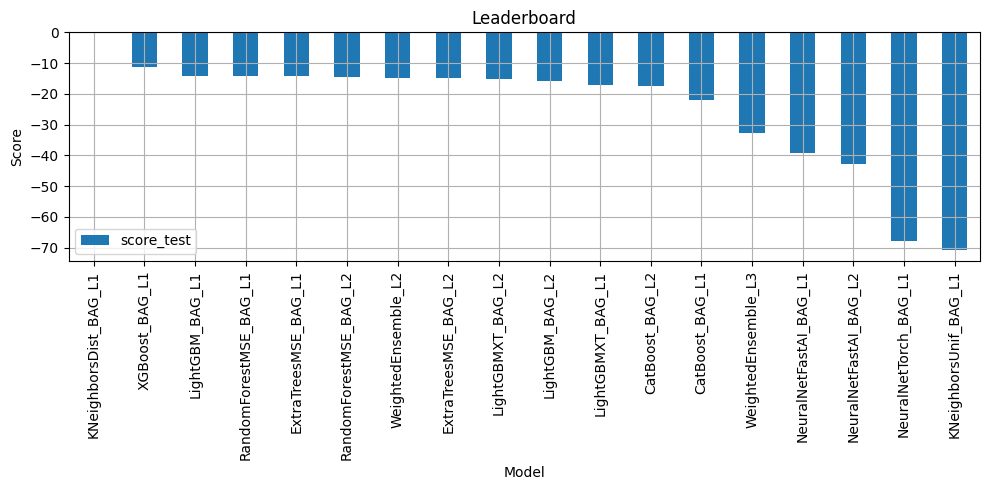

In [99]:
predictor_new_features.leaderboard(train).plot(y='score_test', x='model', figsize=(10, 5), kind='bar')
plt.title('Leaderboard')
plt.ylabel('Score')
plt.xlabel('Model')
plt.grid()
plt.tight_layout()
plt.savefig('leaderboard_new_features.png')
fit_summary = predictor_new_features.fit_summary()

In [40]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -29.491365  root_mean_squared_error       9.753374  392.859766                0.001001           0.030896            3       True         18
1   NeuralNetFastAI_BAG_L2  -29.860037  root_mean_squared_error       9.598421  291.025093                0.278556          18.780465            2       True         17
2          CatBoost_BAG_L2  -30.348498  root_mean_squared_error       9.368399  371.628932                0.048534          99.384304            2       True         15
3          LightGBM_BAG_L2  -30.452620  root_mean_squared_error       9.425282  274.664100                0.105418           2.419473            2       True         13
4        LightGBMXT_BAG_L2  -31.190228  root_mean_squared_error       9.637988  276.178119   

c:\Users\mmabd\.conda\envs\myenv\lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsemb

In [100]:
# Remember to set all negative values to zero
predictions = predictor_new_features.predict(test)
predictions[predictions < 0] = 0

In [101]:
# Same submitting predictions
submission_new_features = pd.read_csv("bike-sharing-demand/sampleSubmission.csv")
submission_new_features["count"] = predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [102]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/195k [00:00<?, ?B/s]
  4%|▍         | 8.00k/195k [00:00<00:07, 25.4kB/s]
100%|██████████| 195k/195k [00:00<00:00, 583kB/s]  
100%|██████████| 195k/195k [00:01<00:00, 126kB/s]


In [103]:
!kaggle competitions submissions -c bike-sharing-demand 

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2024-04-18 18:06:12  new features                       complete  0.76606      0.76606       
submission_new_hpo.csv       2024-04-18 16:02:21  new features with hyperparameters  complete  0.49538      0.49538       
submission_new_features.csv  2024-04-18 15:48:24  new features                       complete  0.71615      0.71615       
submission.csv               2024-04-18 14:32:49  first raw submission               complete  1.86413      1.86413       


#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [25]:
predictor_new_hpo = TabularPredictor(label='count',learner_kwargs={"ignored_columns": ["casual", "registered"]}).fit(train_data=train,
                                                       hyperparameters={'GBM': {'num_boost_round': 100}, 'CAT': {'iterations': 100}},
                                                        time_limit=600,
                                                        presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels\ag-20240418_202439"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels\ag-20240418_202439\ds_sub_fit\sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 36 seconds 

*** Summary of fit() ***
Estimated performance of each model:
                    model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3 -32.056100  root_mean_squared_error      11.421226  376.178313                0.000000           0.022380            3       True         13
1     WeightedEnsemble_L2 -32.242572  root_mean_squared_error      10.867939  238.622376                0.001009           0.019983            2       True          6
2         CatBoost_BAG_L2 -32.384633  root_mean_squared_error      11.079339  319.825139                0.032548          51.065424            2       True          9
3         LightGBM_BAG_L2 -32.742828  root_mean_squared_error      11.086132  270.527882                0.039341           1.768168            2       True          7
4          XGBoost_BAG_L2 -32.921849  root_mean_squared_error      11.182056  271.357217               

c:\Users\mmabd\.conda\envs\myenv\lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L2': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1': -33.89480873339566,
  'LightGBMXT_BAG_L1': -34.50400281754719,
  'CatBoost_BAG_L1': -33.68370890371008,
  'XGBoost_BAG_L1': -34.61080469243705,
  'NeuralNetTorch_BAG_L1': -55.37171060911914,
  'WeightedEnsemble_L2': -32.2425716116

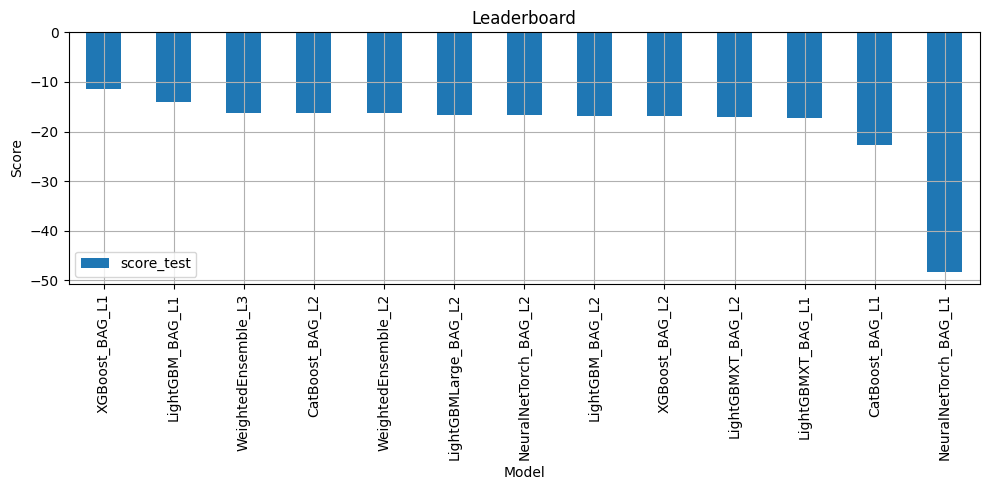

In [13]:
predictor_new_hpo.leaderboard(train).plot(y='score_test', x='model', figsize=(10, 5), kind='bar')
plt.title('Leaderboard')
plt.ylabel('Score')
plt.xlabel('Model')
plt.grid()
plt.tight_layout()
plt.savefig('leaderboard_new_hpo.png')
predictor_new_hpo.fit_summary()

In [28]:
# Remember to set all negative values to zero
predictions = predictor_new_hpo.predict(test)
predictions[predictions < 0] = 0


In [29]:
# Same submitting predictions
submission_new_hpo = pd.read_csv("bike-sharing-demand/sampleSubmission.csv")
submission_new_hpo["count"] = predictions
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [30]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/194k [00:00<?, ?B/s]
  8%|▊         | 16.0k/194k [00:00<00:03, 51.7kB/s]
100%|██████████| 194k/194k [00:01<00:00, 145kB/s]  


In [31]:
!kaggle competitions submissions -c bike-sharing-demand 

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-04-18 20:27:49  new features with hyperparameters  complete  0.51796      0.51796       
submission_new_hpo.csv       2024-04-18 20:05:11  new features with hyperparameters  complete  0.49363      0.49363       
submission_new_hpo.csv       2024-04-18 18:07:53  new features with hyperparameters  complete  0.49727      0.49727       
submission_new_features.csv  2024-04-18 18:06:12  new features                       complete  0.76606      0.76606       
submission_new_hpo.csv       2024-04-18 16:02:21  new features with hyperparameters  complete  0.49538      0.49538       
submission_new_features.csv  2024-04-18 15:48:24  new features                       complete  0.71615      0.71615       
submission.csv  

#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

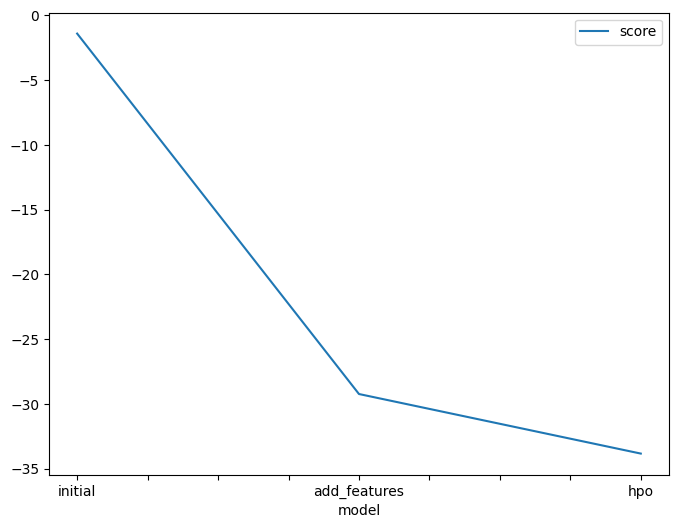

In [111]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-1.413995, -29.232798, -33.829690]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

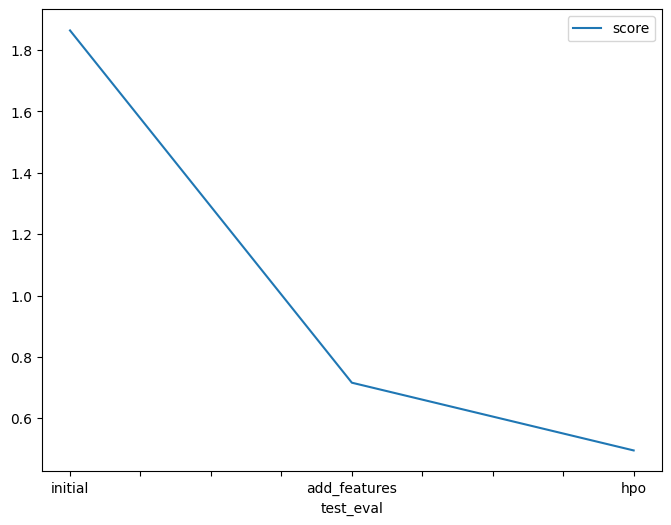

In [112]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.86413, 0.71615, 0.49363]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [33]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo", 'hpo'],
    "hpo1": ['default', 'default', 'GBM: num_boost_round: 100','default'],
    "hpo2": ['default', 'default', 'CAT: iterations: 100', 'default'],
    "hpo3": ['default', 'default', 'default','multimodel:True'],
    "score": [1.86413, 0.71615, 0.51796, 0.49363]
})


,model,hpo1,hpo2,hpo3,score
0,initial,default,default,default,1.86413
1,add_features,default,default,default,0.71615
2,hpo,GBM: num_boost_round: 100,CAT: iterations: 100,default,0.51796
3,hpo,default,default,multimodel:True,0.49363
